# Sorting 

Data sorting is any process that involves arranging the data into some meaningful order to make it easier to understand, analyze or visualize. When working with research data, sorting is a common method used for visualizing data in a form that makes it easier to comprehend the story the data is telling.  Sorting can be done with raw data (across all records) or at an aggregated level (in a table, chart, or some other aggregated or summarized output).

## Partial Sorts: Partitioning

Sometimes we're not interested in sorting the entire array, but simply want to find the *k* smallest values in the array. NumPy provides this in the ``np.partition`` function. ``np.partition`` takes an array and a number *K*; the result is a new array with the smallest *K* values to the left of the partition, and the remaining values to the right, in arbitrary order:

In [3]:
import numpy as np
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values.
Within the two partitions, the elements have arbitrary order.

Similarly to sorting, we can partition along an arbitrary axis of a multidimensional array:

In [4]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))

np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

The result is an array where the first two slots in each row contain the smallest values from that row, with the remaining values filling the remaining slots.



## Example: k-Nearest Neighbors

First, let us explain what is k-Nearest Neighbors (KNN) : is one of the simplest methods in machine learning, it is a type of supervised machine learning algorithms used for classification and regression.

KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. 

KNN refers to the number of nearest neighbors.

Advantages of KNN:
1. Robust to noisy training data
2. Effective if training data is large
3. No training phase
4. Learns complex models easily

Disadvantage of KNN:
1. Need to determine value of the parameter K
2. Computation cost is high

Let's see this algorithm in action with the help of a simple example. Suppose you have a dataset with two variables, which when plotted, looks like the one in the following figure.

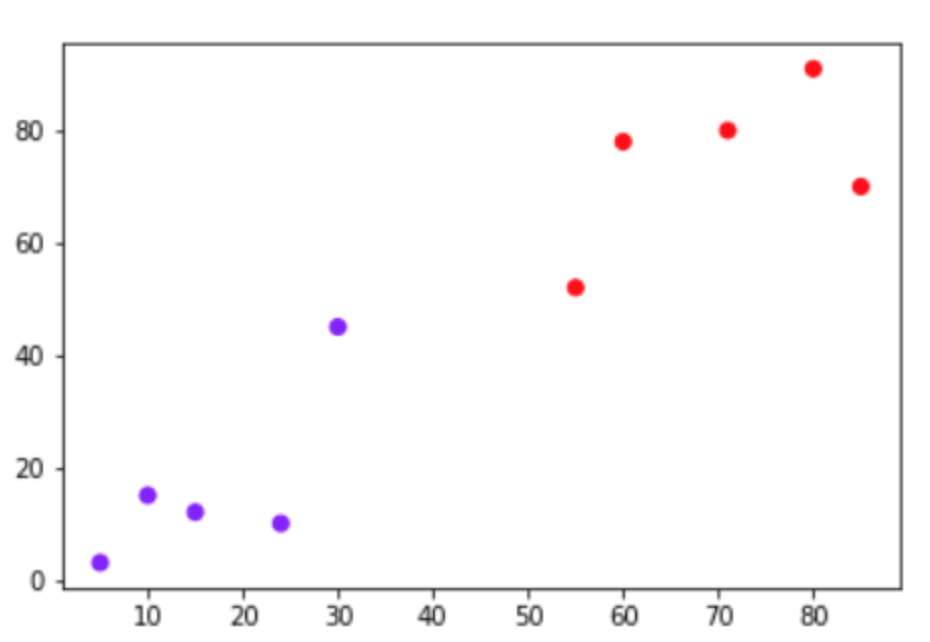


Your task is to classify a new data point with 'X' into "Blue" class or "Red" class. The coordinate values of the data point are x=45 and y=50. Suppose the value of K is 3. The KNN algorithm starts by calculating the distance of point X from all the points. It then finds the 3 nearest points with least distance to point X. This is shown in the figure below. The three nearest points have been encircled.

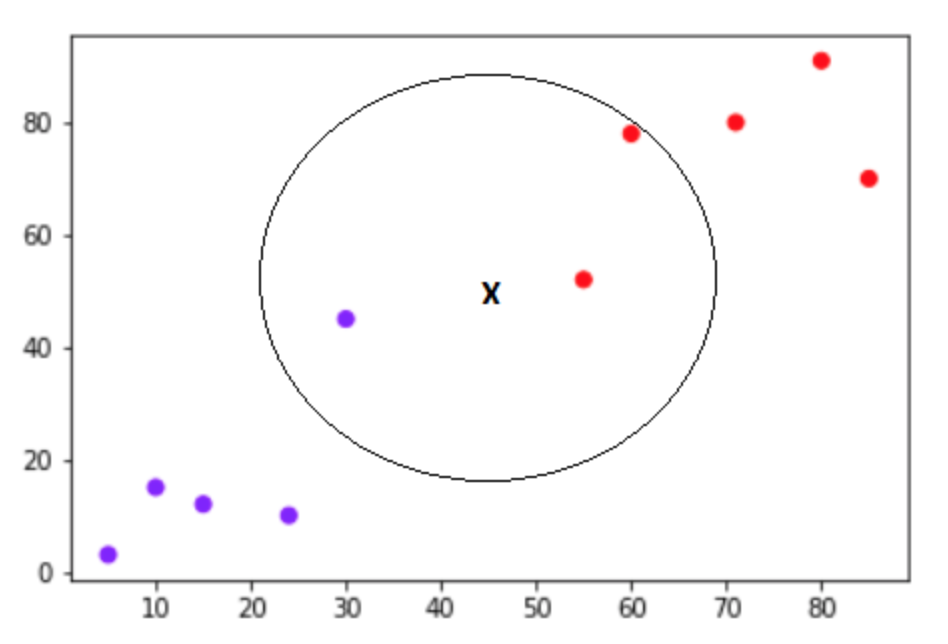


The final step of the KNN algorithm is to assign new point to the class to which majority of the three nearest points belong. From the figure above we can see that the two of the three nearest points belong to the class "Red" while one belongs to the class "Blue". Therefore the new data point will be classified as "Red".


## The Dataset
We are going to use the famous iris data set for our KNN example. The dataset consists of four attributes: sepal-width, sepal-length, petal-width and petal-length. These are the attributes of specific types of iris plant. The task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica.

## Importing Libraries


In [36]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
import math
import operator

## Importing the Dataset
To import the dataset and load it into our pandas dataframe, execute the following code:

In [14]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)  

In [37]:
dataset.head()  


,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Executing the above script will display the first five rows of our dataset as shown below:



## Preprocessing
The next step is to split our dataset into its attributes and labels. To do so, use the following code:

In [16]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 4].values  

The X variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.

## Train Test Split
To avoid over-fitting, we will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on un-seen data, as it would be in a production application.

To create training and test splits, execute the following script:

In [41]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

The above script splits the dataset into 80% train data and 20% test data. This means that out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records.

The following script performs feature scaling:



In [18]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  # only compute mean and std here
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) # perform standardization by centering and scaling

## Training and Predictions
It is extremely straight forward to train the KNN algorithm and make predictions with it, especially when using Scikit-Learn.

In [19]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  #train the classifier 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. In the second line, this class is initialized with one parameter, i.e. n_neigbours. This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, however to start out, 5 seems to be the most commonly used value for KNN algorithm.

The final step is to make predictions on our test data. To do so, execute the following script:

In [38]:
y_pred = classifier.predict(X_test)  

## Evaluating the Algorithm
For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:

In [40]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[12  0  0]
 [ 0  9  0]
 [ 0  1  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.89      0.94         9

    avg / total       0.97      0.97      0.97        30



## End Notes

KNN algorithm is one of the simplest classification algorithm. Even with such simplicity, it can give highly competitive results. KNN algorithm can also be used for regression problems. The only difference from the discussed methodology will be using averages of nearest neighbors rather than voting from nearest neighbors. 

## Github account

https://github.com/ShadaAlharbi
